<a href="https://colab.research.google.com/github/Risingresearchlab/Risingresearchlab/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


Paper Link: http://www.ejournal.radenintan.ac.id/index.php/IJECS/article/view/10393

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dataset.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
dataset.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
dataset.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
dataset.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
dataset.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
dataset.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
mapping = {'Male' :1 , 'Female' : 0 ,'Other' : 3}
dataset['gender'] = dataset['gender'].map(mapping)
mapping = {'Yes' :1 , 'No' : 0 }
dataset['ever_married'] = dataset['ever_married'].map(mapping)
mapping = {'Private' :1 , 'Self-employed' : 2, 'Govt_job' :3, 'children':4, 'Never_worked':5 }
dataset['work_type'] = dataset['work_type'].map(mapping)
mapping = {'Urban' :1 , 'Rural' : 0 }
dataset['Residence_type'] = dataset['Residence_type'].map(mapping)
mapping={'formerly smoked':1, 'never smoked': 2, 'smokes':3, 'Unknown': 4 }
dataset['smoking_status'] = dataset['smoking_status'].map(mapping)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,2,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,1,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,1,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,2,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,2,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,2,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,1,0,166.29,25.6,1,0


In [ ]:
dataset.isnull().values.sum()

201

In [ ]:
null_columns=dataset.columns[dataset.isnull().any()]
dataset[null_columns].isnull().sum()

bmi    201
dtype: int64

In [ ]:
dataset['bmi'].fillna(dataset['bmi'].mode()[0], inplace=True)
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,0,61.0,0,0,1,2,0,202.21,28.7,2,1
2,1,80.0,0,1,1,1,0,105.92,32.5,2,1
3,0,49.0,0,0,1,1,1,171.23,34.4,3,1
4,0,79.0,1,0,1,2,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,1,83.75,28.7,2,0
5106,0,81.0,0,0,1,2,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,2,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,1,0,166.29,25.6,1,0


In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,0,61.0,0,0,1,2,0,202.21,28.7,2,1
2,1,80.0,0,1,1,1,0,105.92,32.5,2,1
3,0,49.0,0,0,1,1,1,171.23,34.4,3,1
4,0,79.0,1,0,1,2,0,174.12,24.0,2,1


In [ ]:
x=dataset.drop('stroke', axis=1)
y=dataset.stroke

In [ ]:
x = dataset[['gender','age','hypertension','heart_disease','ever_married','Residence_type','work_type','avg_glucose_level','bmi','smoking_status']]
y = dataset['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
model = BernoulliNB()

In [ ]:
model.fit(x_train,y_train)


BernoulliNB()

In [ ]:
pred=model.predict(x_test)

In [ ]:
print('Classification Report of BernoulliNB:\n',classification_report(y_test, pred))

Classification Report of BernoulliNB:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

[[1458    0]
 [  75    0]]

Accuracy: 0.9511


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score
import seaborn as sns
clf = BernoulliNB()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print('Classification Report of NB:\n',classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))


Classification Report of NB:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1413
           1       0.20      0.03      0.06        60

    accuracy                           0.96      1473
   macro avg       0.58      0.51      0.52      1473
weighted avg       0.93      0.96      0.94      1473

[[1405    8]
 [  58    2]]

Accuracy: 0.9552


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score
import seaborn as sns
clf = MultinomialNB()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print('Classification Report of NB:\n',classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))



Classification Report of NB:
               precision    recall  f1-score   support

           0       0.97      0.61      0.75      1413
           1       0.06      0.58      0.11        60

    accuracy                           0.61      1473
   macro avg       0.52      0.60      0.43      1473
weighted avg       0.93      0.61      0.72      1473

[[858 555]
 [ 25  35]]

Accuracy: 0.6062


In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Classification Report of MLP:\n',classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))



Classification Report of MLP:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

[[1458    0]
 [  75    0]]

Accuracy: 0.9511


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import linear_model
model = linear_model.SGDClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Classification Report of SDG:\n',classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))



Classification Report of SDG:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1458
           1       0.21      0.25      0.23        75

    accuracy                           0.92      1533
   macro avg       0.58      0.60      0.59      1533
weighted avg       0.92      0.92      0.92      1533

[[1386   72]
 [  56   19]]

Accuracy: 0.9165


In [ ]:
# Support vector machine
from sklearn import svm
model = svm.SVC()
model.fit(x_train,y_train) 
pred=model.predict(x_test)
print('Classification Report of SVM:\n',classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

[[1458    0]
 [  75    0]]

Accuracy: 0.9511


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

In [ ]:
predictions = neigh.predict(x_test)
print('Classification Report of KNN:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.25      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533

Confusion Matrix:
 [[1455    3]
 [  74    1]]

Accuracy: 0.9511


#Choosing optimal value of K

Minimum error:- 0.04892367906066536 at K = 9


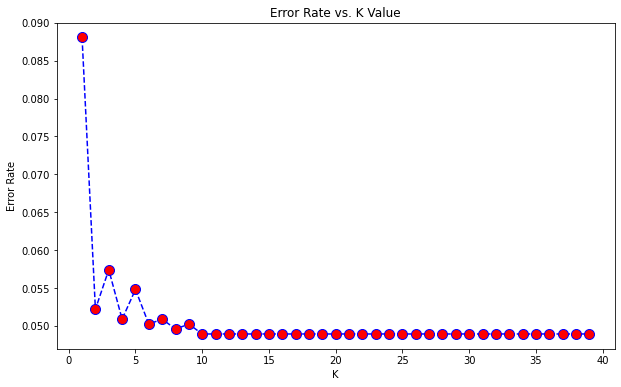

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9510763209393346 at K = 9


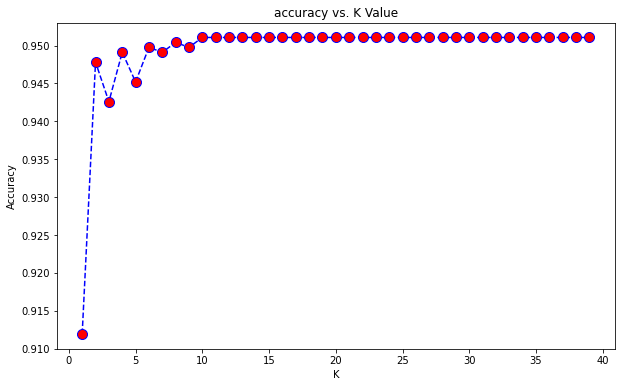

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
# Binomial_logistic_regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)

Coefficients: [[ 0.14004859  0.06632991  0.21369951  0.66629547 -0.68154545  0.26124337
  -0.34782272  0.00274819 -0.00751055 -0.11362137]]
Intercept: [-5.75625856]


In [ ]:
predictions = logreg.predict(x_test)
print('Classification Report BLR:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

Classification Report BLR:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

Confusion Matrix:
 [[1458    0]
 [  75    0]]

Accuracy: 0.9511


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# adaptive_boosting
from sklearn.ensemble import AdaBoostClassifier
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
model = AdaModel.fit(x_train, y_train)
predictions = AdaModel.predict(x_test)
print('Classification Report of AdaBoost:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

Classification Report of AdaBoost:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.33      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533

Confusion Matrix:
 [[1456    2]
 [  74    1]]

Accuracy: 0.9511


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15, max_depth=13, random_state=15)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Classification Report of Random Forest:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))

Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

Confusion Matrix:
 [[1453    5]
 [  75    0]]

Accuracy: 0.9478
